In [36]:
!pip install pandas
import pandas as pd
!pip install seaborn
!pip install matplotlib
!pip install hvplot

  Using cached hvplot-0.8.2-py2.py3-none-any.whl (3.2 MB)
  Using cached panel-0.14.2-py2.py3-none-any.whl (17.1 MB)
  Using cached holoviews-1.15.3-py2.py3-none-any.whl (4.3 MB)


ERROR: Could not install packages due to an OSError: [WinError 206] The filename or extension is too long: 'C:\\Users\\munee\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\panel\\dist\\bundled\\datatabulator\\@holoviz\\panel@0.14.2\\dist\\bundled\\datatabulator\\tabulator-tables@5.3.2\\dist\\css'



In [160]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import hvplot.pandas

# Topic

In my research at Salvatori, I have been studying the reentry programs for ex-prisoners. For my research to have a big impact, I want to focus on the states with the highest prisoners per capita. Then I would like to analyze the types of crimes that occur in these areas. With this information, I want to formulate programs that can lower recidivsim in those areas.

In [229]:
# save state crimes as a csv file from here https://www.kaggle.com/datasets/christophercorrea/prisoners-and-crime-in-united-states
crimes_us = pd.read_csv("./state_crimes.csv")

In [230]:
crimes_us.shape # there are 816 rows and 17 columns in dataset

(816, 17)

In [231]:
crimes_us.columns

Index(['jurisdiction', 'includes_jails', 'year', 'prisoner_count',
       'crime_reporting_change', 'crimes_estimated', 'state_population',
       'violent_crime_total', 'murder_manslaughter', 'rape_legacy',
       'rape_revised', 'robbery', 'agg_assault', 'property_crime_total',
       'burglary', 'larceny', 'vehicle_theft'],
      dtype='object')

In [232]:
crimes_us.isnull().any()

jurisdiction              False
includes_jails            False
year                      False
prisoner_count            False
crime_reporting_change     True
crimes_estimated           True
state_population           True
violent_crime_total        True
murder_manslaughter        True
rape_legacy                True
rape_revised               True
robbery                    True
agg_assault                True
property_crime_total       True
burglary                   True
larceny                    True
vehicle_theft              True
dtype: bool

In [233]:
before_na = crimes_us.shape[0]
crimes_us = crimes_us.dropna()
after_na = crimes_us.shape[0]

In [234]:
before_na - after_na #removed 667 rows with na values

667

In [235]:
crimes_us.head(10)
crimes_us['jurisdiction'].unique().shape[0]

50

In [236]:
column_names = ['murder_manslaughter', 'rape_revised', 'robbery',
       'agg_assault', 'burglary', 'larceny',
       'vehicle_theft'] # Drop the rapes legacy because rapes revised is more accurate
crimes_us['violent_crime_standalone'] = crimes_us['violent_crime_total'] - crimes_us['murder_manslaughter'] - crimes_us['rape_revised'] - crimes_us['robbery'] - crimes_us['agg_assault']
crimes_us['property_crime_standalone'] = crimes_us['property_crime_total'] - crimes_us['burglary'] - crimes_us['larceny'] - crimes_us['vehicle_theft']
crimes_us['total_crime'] = crimes_us[column_names].sum(axis = 1)
crimes_us['prisoners_per_capita'] = crimes_us['prisoner_count']/crimes_us['state_population']


In [237]:
crimes_us['rapes_per_capita'] = crimes_us['rape_revised']/crimes_us['state_population']
crimes_us['robbery_per_capita'] = crimes_us['robbery']/crimes_us['state_population']
crimes_us['agg_assault_per_capita'] = crimes_us['agg_assault']/crimes_us['state_population']
crimes_us['burglary_per_capita'] = crimes_us['burglary']/crimes_us['state_population']
crimes_us['larceny_per_capita'] = crimes_us['larceny']/crimes_us['state_population']
crimes_us['vehicle_theft_per_capita'] = crimes_us['vehicle_theft']/crimes_us['state_population']

In [238]:
crimes_us.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,149.0,2.013993e+03,8.178469e-01,2013.000000,2.013000e+03,2.014000e+03,2.015000e+03,2.015000e+03
prisoner_count,149.0,2.505793e+04,3.073742e+04,1576.000000,5.925000e+03,1.578400e+04,3.005000e+04,1.553770e+05
state_population,149.0,6.275150e+06,7.041994e+06,583223.000000,1.850326e+06,4.425092e+06,6.973742e+06,3.914482e+07
violent_crime_total,149.0,2.368407e+04,2.959444e+04,622.000000,5.275000e+03,1.611800e+04,2.726400e+04,1.668830e+05
murder_manslaughter,149.0,2.905034e+02,3.402168e+02,10.000000,5.400000e+01,1.700000e+02,3.990000e+02,1.861000e+03
rape_legacy,149.0,1.684101e+03,1.771009e+03,99.000000,5.710000e+02,1.182000e+03,1.904000e+03,9.387000e+03
rape_revised,149.0,2.328537e+03,2.446567e+03,110.000000,7.780000e+02,1.672000e+03,2.553000e+03,1.281100e+04
robbery,149.0,6.463181e+03,9.235563e+03,53.000000,1.043000e+03,3.551000e+03,7.265000e+03,5.364000e+04
agg_assault,149.0,1.460185e+04,1.801655e+04,432.000000,3.316000e+03,9.809000e+03,1.776000e+04,9.934900e+04
property_crime_total,149.0,1.644833e+05,1.908509e+05,8806.000000,4.329700e+04,1.187190e+05,1.896550e+05,1.024914e+06


In [239]:
del crimes_us['rape_legacy']
del crimes_us['violent_crime_total']
del crimes_us['property_crime_total']
del crimes_us['violent_crime_standalone']
del crimes_us['property_crime_standalone']

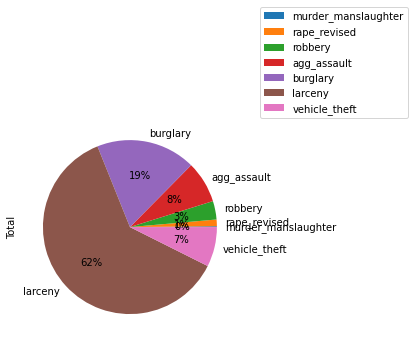

In [240]:
column_names_sum = ['murder_manslaughter', 'rape_revised', 'robbery',
       'agg_assault', 'burglary', 'larceny',
       'vehicle_theft']
crimes_us.loc['Total']= crimes_us[column_names_sum].sum()
crime_categories = crimes_us.loc[['Total']]
crime_stats = crime_categories[column_names_sum].transpose()
crime_stats.plot(kind = 'pie',y = 'Total', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1.10, 1), loc='lower left', borderaxespad=0)

In [241]:
crime_per_jurisdiction = crimes_us[['jurisdiction','total_crime']].groupby('jurisdiction').sum('prisoner_count')
crime_per_jurisdiction.sort_values(by = 'total_crime', ascending = False).head(5)

,total_crime
jurisdiction,
CALIFORNIA,3466344.0
TEXAS,2785360.0
FLORIDA,2150026.0
GEORGIA,1094106.0
OHIO,1064117.0


In [242]:
year_2015 = crimes_us[crimes_us['year'] == 2015]
sort = year_2015[['jurisdiction','state_population','prisoner_count']].sort_values(by = 'state_population', ascending = True).reset_index(drop = True)
jurisdictions = ['DELAWARE','ALASKA','OKLAHOMA','ARIZONA','TEXAS','ALABAMA','GEORGIA','MISSOURI','MISSISSIPPI','FLORIDA','CONNECTICUT']
sort[sort['jurisdiction'].isin(jurisdictions)]

,jurisdiction,state_population,prisoner_count
2,ALASKA,738432.0,5247.0
5,DELAWARE,945934.0,6437.0
18,MISSISSIPPI,2992333.0,13967.0
21,CONNECTICUT,3590886.0,16024.0
22,OKLAHOMA,3911338.0,27321.0
26,ALABAMA,4858979.0,25212.0
32,MISSOURI,6083672.0,32295.0
36,ARIZONA,6828065.0,42204.0
42,GEORGIA,10214860.0,52002.0
46,FLORIDA,20271272.0,99485.0


In [243]:
crimes_us.drop(crimes_us.index[(crimes_us["jurisdiction"].isin(['DELAWARE','ALASKA']))],axis=0,inplace=True)


# Data Set Description

This dataset is very rich for several reasons. Firstly, the dataset has crime statistics for 50 jurisdictions in the United States. Secondly, the dataset categorizes crime statistics, which allows me to explore the distribution of different kinds of crime across the states.

To investigate a cleaner version of the dataset, I did the following:
- I dropped the NA or missing values. The original dataset had 816 rows. After cleaning the dataset, we had 149 rows
- I wanted to calculate total crime in each state for the period 2013-2015. I found that violent crime total is an aggregate of robbery, murder, rape, and aggravated assault. I also noticed that property crime is a sum of burglary, larceny and vehicle theft. Hence I decided to include murder, rape, robbery, aggravated assault, burglary, larceny and vehicle theft in my calculation of total crime
- I created a summary table for our dataset, which is shown above. The dataset corresponds to the years 2013 to 2015. The categories of crime that we set to explore are murder, rape, robbery, aggravated assault, burglary, larceny and vehicle theft
- I then drew a pie chart of the different categories of crime in the US as a whole. Larceny forms the largest proportion of crimes, and murders forms the smallest proportion
- I then listed the top 5 jursidictions with the highest number of prisoners. However, I also wanted to control for state population. Hence I decided to focus on the top 10 states each year over the perido 2013-2015 by prisoners per capita

In [244]:
crimes_us.hvplot('year','prisoner_count',by='jurisdiction', ylim=(0,160000))


:NdOverlay   [jurisdiction]
   :Curve   [year]   (prisoner_count)

,jurisdiction,prisoners_per_capita
648,OKLAHOMA,0.006583
615,ARIZONA,0.006184
655,TEXAS,0.005862
613,ALABAMA,0.005549
622,GEORGIA,0.005373
637,MISSOURI,0.005211
636,MISSISSIPPI,0.005211
621,FLORIDA,0.005150
616,ARKANSAS,0.004831
619,CONNECTICUT,0.004812


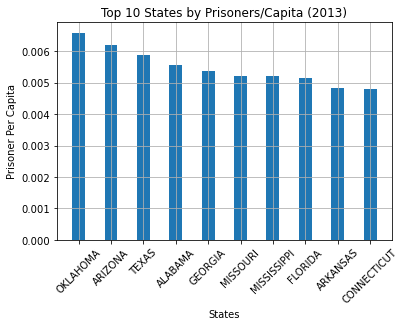

In [245]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
year_2013 = crimes_us[crimes_us['year'] == 2013]
count_prisoners = year_2013[['jurisdiction','prisoners_per_capita']].sort_values(by = ['prisoners_per_capita'], ascending = [False]).head(10)
plt.bar('jurisdiction', 'prisoners_per_capita', width = 0.4, data = count_prisoners)
plt.xlabel('States')
plt.ylabel('Prisoner Per Capita')
plt.title('Top 10 States by Prisoners/Capita (2013)')
plt.xticks(rotation = 45)
plt.grid()

count_prisoners

,jurisdiction,prisoners_per_capita
699,OKLAHOMA,0.006832
666,ARIZONA,0.006260
706,TEXAS,0.005722
664,ALABAMA,0.005391
688,MISSOURI,0.005261
673,GEORGIA,0.005221
667,ARKANSAS,0.005141
672,FLORIDA,0.005071
677,INDIANA,0.004926
670,CONNECTICUT,0.004675


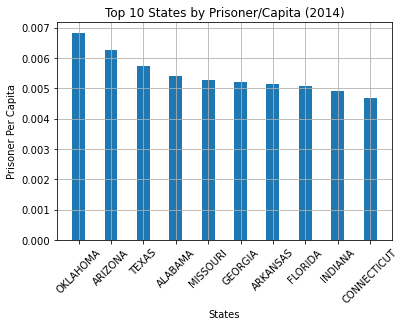

In [246]:
year_2014 = crimes_us[crimes_us['year'] == 2014]
count_prisoners = year_2014[['jurisdiction','prisoners_per_capita']].sort_values(by = ['prisoners_per_capita'], ascending = [False]).head(10)
plt.bar('jurisdiction', 'prisoners_per_capita', width = 0.4, data = count_prisoners)
plt.xlabel('States')
plt.ylabel('Prisoner Per Capita')
plt.title('Top 10 States by Prisoner/Capita (2014)')
plt.xticks(rotation = 45)
plt.grid()
count_prisoners

In [48]:
prisoner_stats = crimes_us.sort_values(by = ['prisoner_count'], ascending = [False]).head(30)
prisoner_stats.groupby('year').count()['jurisdiction']


year
2013    10
2014    11
2015     9
Name: jurisdiction, dtype: int64

,jurisdiction,prisoners_per_capita
750,OKLAHOMA,0.006985
717,ARIZONA,0.006181
757,TEXAS,0.005551
739,MISSOURI,0.005308
718,ARKANSAS,0.005300
715,ALABAMA,0.005189
724,GEORGIA,0.005091
723,FLORIDA,0.004908
738,MISSISSIPPI,0.004668
742,NEVADA,0.004578


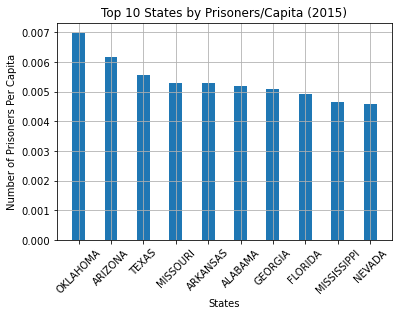

In [247]:
year_2015 = crimes_us[crimes_us['year'] == 2015]
count_prisoners = year_2015[['jurisdiction','prisoners_per_capita']].sort_values(by = ['prisoners_per_capita'], ascending = [False]).head(10)
plt.bar('jurisdiction', 'prisoners_per_capita', width = 0.4, data = count_prisoners)
plt.xlabel('States')
plt.ylabel('Number of Prisoners Per Capita')
plt.title('Top 10 States by Prisoners/Capita (2015)')
plt.xticks(rotation = 45)
plt.grid()
count_prisoners

# Prisoner Count/Capita (2013-2015)

Above we explore the states that have the highest prisoner count per capita between 2013 and 2015. I removed Alaska and Delaware because they have too small populations. Not much has changed over the period 2013 to 2015 as similar names pop up each year and the numbers have remained roughly the same. <br>
In general, I observe that prisoners/capita is very small in the top ten states. Oklahoma, Arizona and Texas are always in the top 3. Most of these states are also in the South. When I think about problems in the South, I think of racism and abortion problems. It would interesting to look at race distribution in different states


In [248]:
year_2013_top10 = year_2013.sort_values(by = ['prisoners_per_capita'], ascending = [False]).head(10)
year_2014_top10 = year_2014.sort_values(by = ['prisoners_per_capita'], ascending = [False]).head(10)
year_2015_top10 = year_2015.sort_values(by = ['prisoners_per_capita'], ascending = [False]).head(10)

prisoner_stats = pd.concat([year_2013_top10, year_2014_top10,year_2015_top10], ignore_index=True, axis=0)
prisoner_stats.groupby('jurisdiction').count()['year']

jurisdiction
ALABAMA        3
ARIZONA        3
ARKANSAS       3
CONNECTICUT    2
FLORIDA        3
GEORGIA        3
INDIANA        1
MISSISSIPPI    2
MISSOURI       3
NEVADA         1
OKLAHOMA       3
TEXAS          3
Name: year, dtype: int64

In [249]:
jurisdictions_analyze = ['ALABAMA','ARIZONA','ARKANSAS','FLORIDA','GEORGIA','INDIANA','MISSISSIPPI', 'MISSOURI', 'OKLAHOMA',
                        'NEVADA', 'TENNESSEE', 'CONNECTICUT']
prisoner_stats = crimes_us[crimes_us['jurisdiction'].isin(jurisdictions_analyze)]
prisoner_stats.groupby('jurisdiction').count()['year']

jurisdiction
ALABAMA        3
ARIZONA        3
ARKANSAS       3
CONNECTICUT    3
FLORIDA        3
GEORGIA        3
INDIANA        3
MISSISSIPPI    3
MISSOURI       3
NEVADA         3
OKLAHOMA       3
TENNESSEE      3
Name: year, dtype: int64

# Dataset Modifications

I realized that studying the prisoners/capita distribution of 50 states on a graph is not going to give a lot of value. For this reason, I decided to focus on the top 10 states in each year with the most number of crimes. I realize now that this will not help us understand the criminal atmosphere in the safest jurisdictions. I will proceed to explore that later on. 

C:\Users\munee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,state_population,prisoner_count
state_population,1.000000,0.776815
prisoner_count,0.776815,1.000000


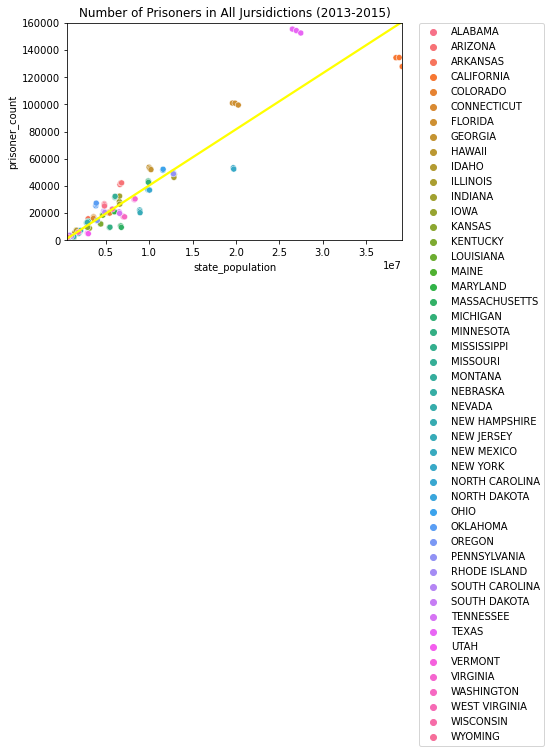

In [250]:
# define data
sb.scatterplot(x='state_population', y= 'prisoner_count', data=crimes_us, hue='jurisdiction')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.ylim(0,160000)
plt.xlabel('State Population in millions')
plt.ylabel('Number of Prisoners')
plt.title("Number of Prisoners in All Jursidictions (2013-2015)")
sb.regplot(crimes_us['state_population'],crimes_us['prisoner_count'], scatter = False, ci = None, color = 'yellow')
crimes_us[['state_population','prisoner_count']].corr(method = 'kendall')


Above I explored the prison populations with respect to state populations. The correlation coefficient between prisoner count and state population is 0.78, which suggests that there is a strong linear relation between state populations and number of prisoners. As the state populations go up, the prison population goes up. 

In [251]:
prisoner_stats.hvplot('year','murder_manslaughter',by='jurisdiction')

:NdOverlay   [jurisdiction]
   :Curve   [year]   (murder_manslaughter)

# Murders

The number of murders is high across most of the states over the 3 years. The term 'high' is very subjective because we are looking at raw numbers.  I decided to not include murders per capita because the values are very small and don't add any value. Florida has almost twice the number of murders over this period compared to the other states. It would be interesting to see why that is the case by integrating data about drugs. <br>

The number of murders is also very constant across the three years with no sign of decrease except in Florida where there was a spike in 2014. <br>

One more statistic to find out is the number of crimes that go unrecorded and one way to find that out is by looking at the corruption score across the different states. My hypothesis is that more corrupt state governments can make murders and other crimes go away with bribes. Hence their crime statistics will be lower.

In [252]:
prisoner_stats.hvplot('year','rapes_per_capita',by='jurisdiction')

:NdOverlay   [jurisdiction]
   :Curve   [year]   (rapes_per_capita)

# Rapes Per Capita

Here, I looked at the revised rape statistics as a proportion of total crime rather than legacy rape statistics. With more information available the rapes statistics were updated. I am not sure why this is the only column that was updated over time. Was there a change in the definition of what constitutes rape? How much have the rape crime statistics changed between rape legacy and rape revised? <br>

In 2013, Oklahoma had the most rape crimes as a proportion of total crimes. Every 6 in 10,000 people were raped. In 2014, Arkansas surpassed Oklahoma with 6 rapes every 10,000 people. In 2015, Arkansas was still on top with 6.5 every 10,000 people raped. <br>

Another frightening finding is that rape crimes per capita has been on the rise over the 3 years in many of these states. Does rape include all gender identities or just women? That will indicate whether our finding are more relevant to women or all gender identities. <br>

In [256]:
prisoner_stats.hvplot('year','robbery_per_capita',by='jurisdiction', ylim = (0,0.0022))

:NdOverlay   [jurisdiction]
   :Curve   [year]   (robbery_per_capita)

# Robberies Per Capita

Nevada has the highest robberies per capita as 2 every 1000 people are robbed every year. 

As an afterthought it would be interesting to see whether prison populations deter crimes by looking at the correlation of total crimes and prison populations. Also, I assume that there will be more crime in poorer areas so it would interesting to look at crime as a variable of median income per state.

In [259]:

prisoner_stats.hvplot('year','agg_assault_per_capita',by='jurisdiction',ylim=(0,0.0047))

:NdOverlay   [jurisdiction]
   :Curve   [year]   (agg_assault_per_capita)

# Aggravated Assault Per Capita

Tennessee has the highest aggravated assault per capita ratio with 4.5 every 1000 people being seriously beaten every year. These ratios are in the single digit percentages and rising in most of the states <br>
It is interesting to note that Florida has seen a spike in aggravated assaults in 2014 just like its spike in murders. I am then led to believe that there is a positive correlation between murders and aggravated assaults. More murders suggests more aggravated assaults and this makes perfect sense. <br>
In safer states, we might have to look at another metric. Also all these proportions are small. Hence the question arises which is what crime makes the highest proportion of total crimes? 

In [263]:
prisoner_stats.hvplot('year','burglary_per_capita',by='jurisdiction',ylim = (0,0.0115))

:NdOverlay   [jurisdiction]
   :Curve   [year]   (burglary_per_capita)

# Burglaries Per Capita

Arkanasas has the highest burglary per capita in 2013 with 1 every 100 people having their house broken into. The good news is that burglaries in Arkansas have declined to third place in 2015. In 2014, Alabama and Mississippi were close contenders with 8 every 1000 people having their houses broken into. In 2015, Mississippi broke the tie breaker and rose to the top with 8 every 1000 people having their houses broken into. <br>

Burglaries form a sizable proportion of total crimes and they are also scary because they involve breaking into homes. Hence urgent action is needed to take care of it. However, burglaries per capita have generally been in decline. In Florida, burglaries went from 7 per 1000 to 5 per 1000. I wonder why Florida has been seeing a spike across many crime statistics in 2014 and then a decline in 2015. <br>

This is also a good statistic to analyze in safer states because it will be large enough to be significant.

In [265]:
prisoner_stats.hvplot('year','larceny_per_capita',by='jurisdiction',ylim=(0,0.025))

:NdOverlay   [jurisdiction]
   :Curve   [year]   (larceny_per_capita)

# Larceny Per Capita

Larceny is theft without the use of force. Hence it is not as serious as other crimes. In 2013, Arkanasas had the highest larcenies per capita with 2.3 thefts every 100 people. In 2014, Florida had a spike in larcenies with 2.5 thefts every 100 people. In 2015, Arkanasas rose to the top again with 2.3 thefts every 100 people. <br>

In general there is not much variation in larcenies per capita across different states

In [267]:

prisoner_stats.hvplot('year','vehicle_theft_per_capita',by='jurisdiction',ylim=(0,0.004))

:NdOverlay   [jurisdiction]
   :Curve   [year]   (vehicle_theft_per_capita)

# Vehicle Theft Per Capita
<br>
Nevada has the highest vehicle theft per capita with the ratio increasing from 3.5 every 1000 people in 2013 to 4 every 1000 people in 2015. Vehicle theft per capita has been variable across the 10 states.<br>

As an afterhought, it can be useful to compare these different ratios in comparison to the national average ratio. We might have to find a more useful metric to evluate crime distribution in safer states because these ratios will be much smaller there and hence of little use. 